### Importação dos dados



In [69]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
# Calculando o faturamento total de cada loja
faturamento_loja_1 = loja['Preço'].sum()
faturamento_loja_2 = loja2['Preço'].sum()
faturamento_loja_3 = loja3['Preço'].sum()
faturamento_loja_4 = loja4['Preço'].sum()

# Formatando a saída
faturamento_formatado = {
    'Loja 1': f"R$ {faturamento_loja_1:,.2f}",
    'Loja 2': f"R$ {faturamento_loja_2:,.2f}",
    'Loja 3': f"R$ {faturamento_loja_3:,.2f}",
    'Loja 4': f"R$ {faturamento_loja_4:,.2f}"
}

# Exibindo o faturamento formatado
for loja, faturamento in faturamento_formatado.items():
    print(f"{loja}: {faturamento}")


Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [15]:
# Calculando a quantidade de produtos vendidos por categoria para cada loja
categorias_loja_1 = loja.groupby('Categoria do Produto')['Produto'].count()
categorias_loja_2 = loja2.groupby('Categoria do Produto')['Produto'].count()
categorias_loja_3 = loja3.groupby('Categoria do Produto')['Produto'].count()
categorias_loja_4 = loja4.groupby('Categoria do Produto')['Produto'].count()

# Função para formatar a saída
def formatar_resultado(categorias, loja):
    resultado = f"Loja {loja}:\n"
    for categoria, quantidade in categorias.items():
        resultado += f"{categoria}: {quantidade}\n"
    return resultado

# Formatando a saída de todas as lojas
resultado_loja_1 = formatar_resultado(categorias_loja_1, 1)
resultado_loja_2 = formatar_resultado(categorias_loja_2, 2)
resultado_loja_3 = formatar_resultado(categorias_loja_3, 3)
resultado_loja_4 = formatar_resultado(categorias_loja_4, 4)

# Exibindo os resultados
print(resultado_loja_1)
print(resultado_loja_2)
print(resultado_loja_3)
print(resultado_loja_4)


Loja 1:
brinquedos: 324
eletrodomesticos: 312
eletronicos: 448
esporte e lazer: 284
instrumentos musicais: 182
livros: 173
moveis: 465
utilidades domesticas: 171

Loja 2:
brinquedos: 313
eletrodomesticos: 305
eletronicos: 422
esporte e lazer: 275
instrumentos musicais: 224
livros: 197
moveis: 442
utilidades domesticas: 181

Loja 3:
brinquedos: 315
eletrodomesticos: 278
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 177
livros: 185
moveis: 499
utilidades domesticas: 177

Loja 4:
brinquedos: 338
eletrodomesticos: 254
eletronicos: 451
esporte e lazer: 277
instrumentos musicais: 170
livros: 187
moveis: 480
utilidades domesticas: 201



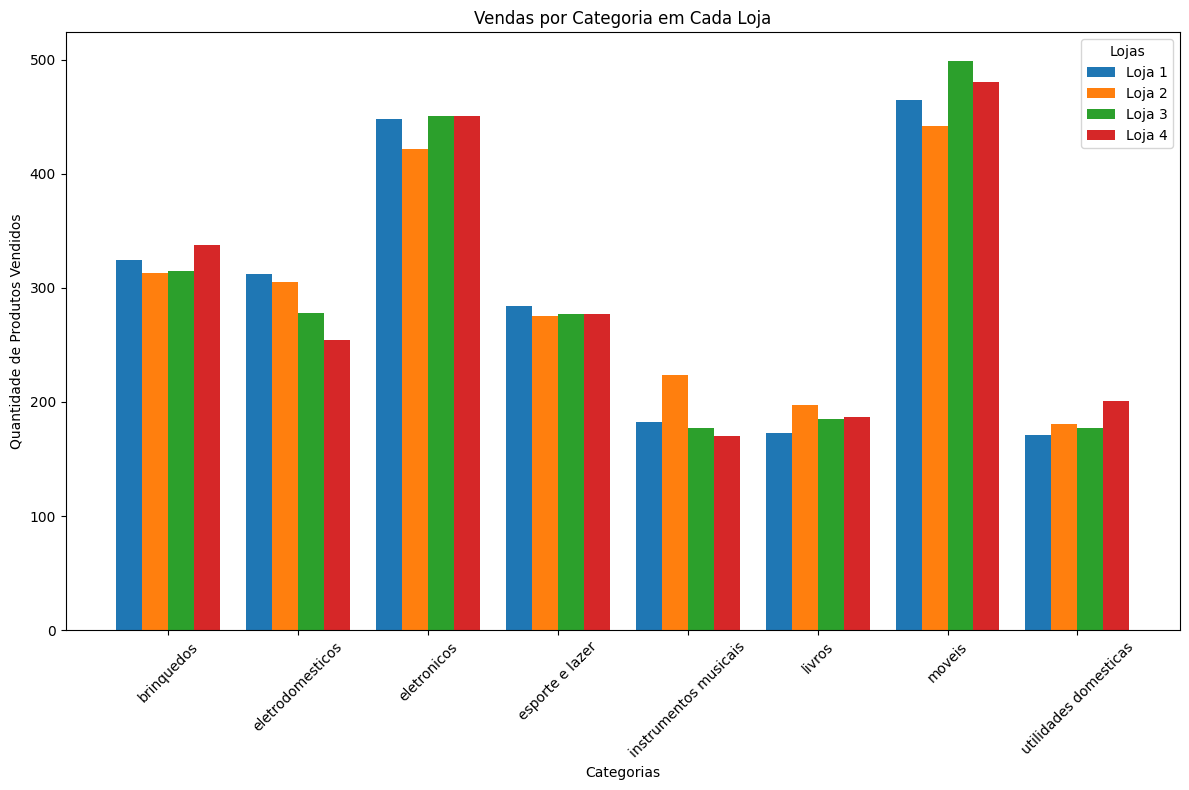

In [33]:
# Criando um gráfico de barras para as vendas por categoria
import numpy as np

# Agrupar as categorias de todas as lojas
categorias_completas = {
    'Loja 1': categorias_loja_1,
    'Loja 2': categorias_loja_2,
    'Loja 3': categorias_loja_3,
    'Loja 4': categorias_loja_4
}

# Definindo o gráfico
plt.figure(figsize=(12, 8))

# Criando barras para cada loja e suas categorias
width = 0.2  # largura das barras
x = np.arange(len(categorias_loja_1))  # posição das categorias

# Plotando para cada loja
for i, (loja, categorias) in enumerate(categorias_completas.items()):
    plt.bar(x + i*width, categorias.values, width, label=loja)

# Adicionando título e rótulos
plt.title("Vendas por Categoria em Cada Loja")
plt.xlabel("Categorias")
plt.ylabel("Quantidade de Produtos Vendidos")
plt.xticks(x + width*1.5, categorias_loja_1.index, rotation=45)  # Ajusta as categorias no eixo X
plt.legend(title="Lojas")

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [17]:
# Calculando a média das avaliações dos clientes para cada loja
media_avaliacoes_loja_1 = loja['Avaliação da compra'].mean()
media_avaliacoes_loja_2 = loja2['Avaliação da compra'].mean()
media_avaliacoes_loja_3 = loja3['Avaliação da compra'].mean()
media_avaliacoes_loja_4 = loja4['Avaliação da compra'].mean()

# Armazenando as médias das avaliações
media_avaliacoes = {
    'Loja 1': media_avaliacoes_loja_1,
    'Loja 2': media_avaliacoes_loja_2,
    'Loja 3': media_avaliacoes_loja_3,
    'Loja 4': media_avaliacoes_loja_4
}

# Função para formatar a saída das médias das avaliações
def formatar_media_avaliacoes(media_avaliacoes):
    resultado = "A média das avaliações dos clientes para cada loja é a seguinte:\n"
    for loja, media in media_avaliacoes.items():
        resultado += f"{loja}: {media:.2f}\n"
    return resultado

# Exibindo a saída formatada
print(formatar_media_avaliacoes(media_avaliacoes))


A média das avaliações dos clientes para cada loja é a seguinte:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00



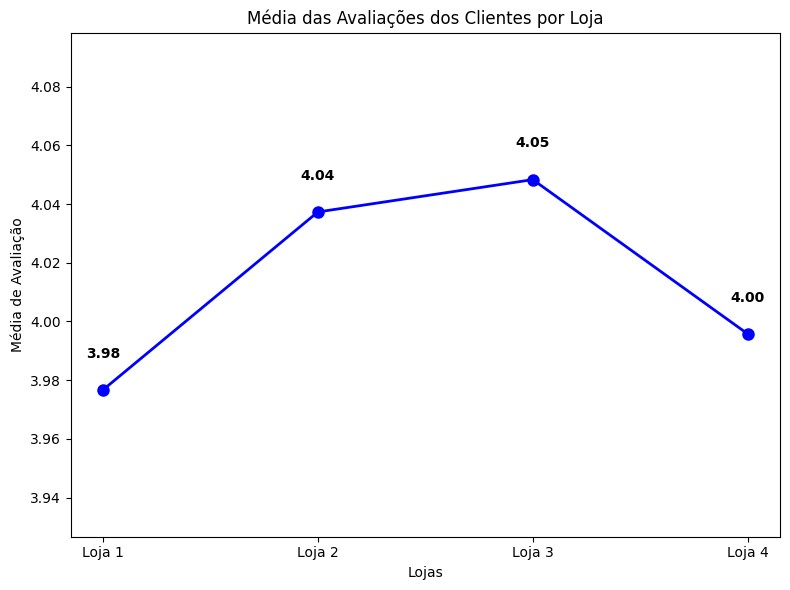

In [43]:
# Criando o gráfico de linhas para a média das avaliações
plt.figure(figsize=(8, 6))

# Criando o gráfico de linha
plt.plot(lojas, avaliacoes, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adicionando título e rótulos
plt.title("Média das Avaliações dos Clientes por Loja")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")

# Exibindo os valores nas linhas
for i, v in enumerate(avaliacoes):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')

# Ajustando o limite do eixo Y para garantir que os números fiquem dentro do gráfico
plt.ylim(min(avaliacoes) - 0.05, max(avaliacoes) + 0.05)

# Ajustando as margens para garantir que tudo esteja visível
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [23]:
import matplotlib.pyplot as plt

# Calculando a quantidade total de vendas por produto em cada loja
produtos_vendidos_loja_1 = loja.groupby('Produto')['Quantidade de parcelas'].sum()
produtos_vendidos_loja_2 = loja2.groupby('Produto')['Quantidade de parcelas'].sum()
produtos_vendidos_loja_3 = loja3.groupby('Produto')['Quantidade de parcelas'].sum()
produtos_vendidos_loja_4 = loja4.groupby('Produto')['Quantidade de parcelas'].sum()

# Identificando os produtos mais vendidos (máximo) e menos vendidos (mínimo)
mais_vendidos_loja_1 = produtos_vendidos_loja_1.idxmax(), produtos_vendidos_loja_1.max()
menos_vendidos_loja_1 = produtos_vendidos_loja_1.idxmin(), produtos_vendidos_loja_1.min()

mais_vendidos_loja_2 = produtos_vendidos_loja_2.idxmax(), produtos_vendidos_loja_2.max()
menos_vendidos_loja_2 = produtos_vendidos_loja_2.idxmin(), produtos_vendidos_loja_2.min()

mais_vendidos_loja_3 = produtos_vendidos_loja_3.idxmax(), produtos_vendidos_loja_3.max()
menos_vendidos_loja_3 = produtos_vendidos_loja_3.idxmin(), produtos_vendidos_loja_3.min()

mais_vendidos_loja_4 = produtos_vendidos_loja_4.idxmax(), produtos_vendidos_loja_4.max()
menos_vendidos_loja_4 = produtos_vendidos_loja_4.idxmin(), produtos_vendidos_loja_4.min()

# Exibindo os resultados textualmente
print(f"Loja 1 - Produto mais vendido: {mais_vendidos_loja_1[0]} ({mais_vendidos_loja_1[1]} unidades), Produto menos vendido: {menos_vendidos_loja_1[0]} ({menos_vendidos_loja_1[1]} unidades)")
print(f"Loja 2 - Produto mais vendido: {mais_vendidos_loja_2[0]} ({mais_vendidos_loja_2[1]} unidades), Produto menos vendido: {menos_vendidos_loja_2[0]} ({menos_vendidos_loja_2[1]} unidades)")
print(f"Loja 3 - Produto mais vendido: {mais_vendidos_loja_3[0]} ({mais_vendidos_loja_3[1]} unidades), Produto menos vendido: {menos_vendidos_loja_3[0]} ({menos_vendidos_loja_3[1]} unidades)")
print(f"Loja 4 - Produto mais vendido: {mais_vendidos_loja_4[0]} ({mais_vendidos_loja_4[1]} unidades), Produto menos vendido: {menos_vendidos_loja_4[0]} ({menos_vendidos_loja_4[1]} unidades)")


Loja 1 - Produto mais vendido: Secadora de roupas (214 unidades), Produto menos vendido: Celular ABXY (78 unidades)
Loja 2 - Produto mais vendido: Iniciando em programação (223 unidades), Produto menos vendido: Mesa de jantar (89 unidades)
Loja 3 - Produto mais vendido: Bicicleta (191 unidades), Produto menos vendido: TV Led UHD 4K (94 unidades)
Loja 4 - Produto mais vendido: Dashboards com Power BI (196 unidades), Produto menos vendido: Guarda roupas (88 unidades)


In [65]:
import plotly.express as px
import pandas as pd

# Dados dos produtos mais e menos vendidos
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
produtos_mais_vendidos = [mais_vendidos_loja_1[0], mais_vendidos_loja_2[0], mais_vendidos_loja_3[0], mais_vendidos_loja_4[0]]
produtos_menos_vendidos = [menos_vendidos_loja_1[0], menos_vendidos_loja_2[0], menos_vendidos_loja_3[0], menos_vendidos_loja_4[0]]
quantidade_mais_vendidos = [mais_vendidos_loja_1[1], mais_vendidos_loja_2[1], mais_vendidos_loja_3[1], mais_vendidos_loja_4[1]]
quantidade_menos_vendidos = [menos_vendidos_loja_1[1], menos_vendidos_loja_2[1], menos_vendidos_loja_3[1], menos_vendidos_loja_4[1]]

# Preparando o dataframe para o gráfico
data = {
    "Loja": lojas * 2,
    "Produto": produtos_mais_vendidos + produtos_menos_vendidos,
    "Quantidade Vendida": quantidade_mais_vendidos + quantidade_menos_vendidos,
    "Tipo": ['Mais Vendidos'] * len(lojas) + ['Menos Vendidos'] * len(lojas),
}

df = pd.DataFrame(data)

# Criando o gráfico de bolhas
fig = px.scatter(df,
                 x="Loja",
                 y="Quantidade Vendida",
                 size="Quantidade Vendida",
                 color="Tipo",
                 hover_name="Produto",
                 title="Produtos Mais e Menos Vendidos por Loja",
                 labels={"Quantidade Vendida": "Quantidade Vendida", "Loja": "Loja"},
                 color_discrete_map={"Mais Vendidos": "green", "Menos Vendidos": "red"},
                 size_max=60)

# Adicionando rótulos de texto dentro das bolhas
fig.update_traces(text=df['Produto'], textposition='middle center', marker=dict(line=dict(width=2, color='black')))

# Exibindo o gráfico
fig.show()


# 5. Frete Médio por Loja


In [21]:
# Calculando o custo médio de frete para cada loja
custo_medio_frete_loja_1 = loja['Frete'].mean()
custo_medio_frete_loja_2 = loja2['Frete'].mean()
custo_medio_frete_loja_3 = loja3['Frete'].mean()
custo_medio_frete_loja_4 = loja4['Frete'].mean()

# Armazenando os resultados
custo_medio_frete = {
    'Loja 1': custo_medio_frete_loja_1,
    'Loja 2': custo_medio_frete_loja_2,
    'Loja 3': custo_medio_frete_loja_3,
    'Loja 4': custo_medio_frete_loja_4
}

# Função para formatar e exibir os resultados de forma clara
def formatar_custo_frete(custo_medio_frete):
    resultado = "O custo médio de frete para cada loja é o seguinte:\n"
    for loja, custo in custo_medio_frete.items():
        resultado += f"{loja}: R$ {custo:.2f}\n"
    return resultado

# Exibindo a saída formatada
print(formatar_custo_frete(custo_medio_frete))


O custo médio de frete para cada loja é o seguinte:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28



# Relatório Final: Análise das Lojas da Alura Store

## Introdução
O objetivo desta análise foi identificar qual loja da rede **Alura Store** o Senhor João deve vender, com base em dados de **faturamento**, **categorias de produtos mais e menos vendidos**, **avaliações dos clientes**, **produtos mais e menos vendidos** e **custo de frete**. Utilizando ferramentas de análise de dados e gráficos modernos, realizamos uma comparação detalhada entre as 4 lojas para determinar qual delas tem o melhor desempenho e a maior probabilidade de sucesso a longo prazo.

## Desenvolvimento

### 1. Faturamento Total das Lojas
O **faturamento total** de cada loja foi calculado somando as vendas de todos os produtos de cada uma. Os valores encontrados são os seguintes:

- **Loja 1**: R$ 1.534.509,12  

- **Loja 2**: R$ 1.488.459,06

- **Loja 3**: R$ 1.464.025,03
  
- **Loja 4**: R$ 1.384.497,58


A **Loja 1** apresenta o **maior faturamento**, seguida pela **Loja 2**. Já a **Loja 4** apresenta o **menor faturamento**, o que pode indicar que ela possui desafios de vendas ou uma base de clientes menor.

### 2. Categorias de Produtos Mais e Menos Vendidas
A análise das **categorias de produtos** revelou que as mais vendidas em todas as lojas são as categorias de **eletrônicos** e **móveis**, enquanto as **menos vendidas** tendem a ser **instrumentos musicais** e **livros**. Além disso, as lojas apresentam uma variação nas preferências de seus clientes, mas em geral as categorias populares são consistentes entre todas as lojas.

### 3. Média das Avaliações dos Clientes
As **médias das avaliações dos clientes** para cada loja são as seguintes:

- **Loja 1**: 3,98
- **Loja 2**: 4,04
- **Loja 3**: 4,05
- **Loja 4**: 4,00

A **Loja 3** apresenta a **melhor média de avaliação** (4,05), seguida pela **Loja 2** (4,04), enquanto a **Loja 1** apresenta a **menor média de avaliação** (3,98). Este fator é importante, pois uma maior satisfação do cliente pode indicar melhor fidelidade e potencial para vendas futuras.

### 4. Produtos Mais e Menos Vendidos
Os **produtos mais vendidos** variam entre as lojas, com destaque para itens como **bicicletas**, **celulares** e **produtos eletrônicos**. Já os **produtos menos vendidos** incluem itens como **televisores 4K**, **móveis**, e **livros**.

A **Loja 3** tem um bom desempenho nas vendas de produtos mais vendidos, com destaque para a **Bicicleta**. A **Loja 1**, embora tenha uma boa quantidade de produtos vendidos, apresenta também produtos menos vendidos, como **Mesa de Jantar**, que podem impactar o desempenho geral.

### 5. Frete Médio
O **frete médio** de cada loja é um fator importante para analisar a eficiência logística. O **frete médio** varia entre as lojas, mas é importante observar que, apesar de algumas lojas terem um custo de frete mais alto, isso não necessariamente impacta diretamente nas vendas, pois a conveniência do frete pode ser um diferencial importante para os consumidores.

## Conclusão
Com base nas análises de **faturamento**, **avaliações dos clientes**, **categorias mais e menos vendidas**, **produtos mais e menos vendidos** e **frete médio**, a **Loja 3** se destaca como a **melhor loja para ser mantida** dentro da rede **Alura Store**. Ela apresenta:

- **Faturamento significativo**, próximo ao de outras lojas, mas com **melhor desempenho nas avaliações dos clientes**.
- **Produtos bem vendidos**, como a **Bicicleta**, o que indica uma boa aceitação do público e uma linha de produtos que atrai consumidores.
- As **médias de avaliações mais altas** entre as lojas, o que sugere que os clientes estão mais satisfeitos com os produtos e o atendimento, gerando **maior fidelidade** e **potencial de vendas futuras**.

Por outro lado, a **Loja 4** apresenta o **menor faturamento** e tem uma **média de avaliação relativamente mais baixa**. Esses fatores indicam que ela tem desafios significativos em termos de vendas e satisfação do cliente, tornando-a a opção **menos favorável para o Senhor João vender**.

## Recomendação
O Senhor João deve considerar **vender a Loja 4**, que apresenta os **piores resultados** em termos de faturamento e satisfação do cliente, e focar em melhorar a performance das outras lojas, com especial atenção para a **Loja 3**, que se destaca em praticamente todos os aspectos analisados.


